In [2]:
%load_ext autoreload
%autoreload 2

from src.models.SIRT import sweep_pol_SPB_SIRT, sweep_pol_mean_SIRT, sweep_hom_pol_SIRT
#from src.models.SIRT_D import sweep_pol_SPB_SIRTD
from src.utils.distributions import pol_to_alpha, homogeneous_distribution
from plot_functions import *
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import os

path_Plot_with_labels = "../figures/with_labels/"
path_Plot_without_labels = "../figures/no_labels/"

if not os.path.exists(path_Plot_with_labels):
    os.makedirs(path_Plot_with_labels)

if not os.path.exists(path_Plot_without_labels):
    os.makedirs(path_Plot_without_labels)
def ALPHAS(Np):
    return pol_to_alpha(np.linspace(1/Np/2, 1-1/Np/2, Np)/4)



my_hot_r = discretize_cmaps('hot_r', 12)
my_hot_r.set_bad('gray')

my_vir_r = discretize_cmaps('viridis_r', 12)
my_vir_r.set_bad('gray')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
CP1 = ['#fdbb84','#fc8d59','#ef6548','#d7301f','#990000']   # POL
CP2 = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837']      # what varies is: MEAN
CP3 = ['#d0d1e6','#a6bddb','#74a9cf','#2b8cbe','#045a8d']      # HOM

In [4]:
NP = 100
NS = 100

test_max_range={"m": 0, "M": 0.3, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRT(
    test_max_range=test_max_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    batch_size=1000,
    susceptibility_rate = 0.25,
    N_COMPARTMENTS = 100
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape to original shape 50 x 50
S = S.reshape(NP, NS).transpose()
I = I.reshape(NP, NS).transpose()
R = R.reshape(NP, NS).transpose()
R0 = R0.reshape(NP, NS).transpose()
OH = OH.reshape(NP, NS).transpose()

FIG_A_RI = R + I
FIG_A_R0 = R0
FIG_A_OH = OH


FIG_A_R0_masked = np.copy(FIG_A_R0)
FIG_A_R0_masked[FIG_A_R0_masked < 1] = np.nan  # Set all R0<1 points to nan

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


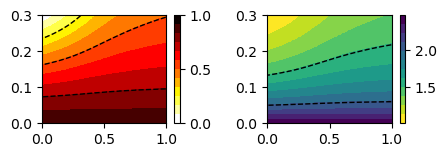

In [5]:
test_rates = homogeneous_distribution(test_max_range["n"], test_max_range["m"], test_max_range["M"])
pol = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])

fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))

cax = ax[0].imshow(FIG_A_RI, cmap=my_hot_r, aspect="auto", origin="lower", 
                   extent=[pol_range["m"],pol_range["M"],test_max_range["m"],test_max_range["M"]],
                   vmin=0, vmax=1)
cbar = fig.colorbar(cax, ax=ax[0])
CS = ax[0].contour(pol, test_rates, FIG_A_RI, 
                   levels=[0.25, 0.5, 0.75], linewidths=1, 
                   colors="black", linestyles="dashed")

cax = ax[1].imshow(FIG_A_R0, cmap=my_vir_r, aspect="auto", origin="lower", 
                   extent=[pol_range["m"],pol_range["M"],test_max_range["m"],test_max_range["M"]])
cbar = fig.colorbar(cax, ax=ax[1])
CS = ax[1].contour(pol, test_rates, FIG_A_R0_masked, 
                   levels=[1, 1.5, 2, 2.5], linewidths=1, 
                   colors="black", linestyles="dashed")



fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


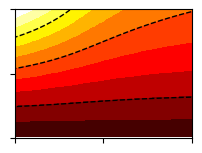

In [6]:
name = "I(pol,test)_SIRT.pdf"
fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_A_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [pol[0],pol[-1],test_rates[0],test_rates[-1]], vmin = 0, vmax = 1)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol, test_rates, FIG_A_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")
#CS = ax.contour(pol, test_rates, FIG_A_R0, levels = [1], linewidths = 2, colors = "gray")
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.15,0.3])
ax.set_xlim([0,1])
ax.set_ylim([0,0.3])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


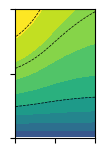

In [7]:
name = "R0(pol,test)_SIRT.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(FIG_A_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", extent = [pol[0],pol[-1],test_rates[0],test_rates[-1]], vmin = 1, vmax = 3)
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(pol, test_rates, FIG_A_RI, levels = [0.25, 0.5, 0.75], linewidths = 0.5, colors = "black", linestyles = "dashed")
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.15,0.3])
ax.set_xlim([0,1])
ax.set_ylim([0,0.3])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


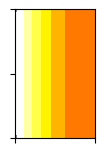

In [8]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


test_max_range={"m": 0.3, "M": 0.3, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRT(
    test_max_range=test_max_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    batch_size=1000,
    susceptibility_rate = 0.25,
    N_COMPARTMENTS = N_COMPARTMENTS
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRT.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)


In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(Lx*4, 0.1))

# Remove all margins and padding
fig.patch.set_visible(False)

# Create an invisible axes with zero size
ax = fig.add_axes([0, 0, 0, 0])
ax.set_visible(False)

# Create the colorbar axes explicitly
cbar_ax = fig.add_axes([0.1, 0.1, 0.2, 0.8])  # [left, bottom, width, height]

# Create the colorbar using your original mappable
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=my_hot_r, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels([])

name = "RI_colorbar.pdf"
fig.savefig(path_Plot_with_labels + name, bbox_inches='tight')
fig.savefig(path_Plot_without_labels + name, bbox_inches='tight')

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure(figsize=(Lx*4, 0.1))

# Remove all margins and padding
fig.patch.set_visible(False)

# Create an invisible axes with zero size
ax = fig.add_axes([0, 0, 0, 0])
ax.set_visible(False)

# Create the colorbar axes explicitly
cbar_ax = fig.add_axes([0.1, 0.1, 0.2, 0.8])  # [left, bottom, width, height]

# Create the colorbar using your original mappable
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=my_vir_r, norm=norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels([])

name = "R0_colorbar.pdf"
fig.savefig(path_Plot_with_labels + name, bbox_inches='tight')
fig.savefig(path_Plot_without_labels + name, bbox_inches='tight')

In [11]:
NP = 100  # number of polarization points
NM = 100  # number of mean points
pol_range={"m": 0, "M": 1, "n": NP}  # polarization range
mean_range={"m": 0, "M": 1, "n": NM}   

#results = run_pol_mean_sweep_SIRT(
results = sweep_pol_mean_SIRT(
    mean_range=mean_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    susceptibility_rate=0.4,
    test_rate = 1/3,  # Set a fixed testing rate
    batch_size=1000
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = np.flipud(S.reshape(NP, NM))
I = np.flipud(I.reshape(NP, NM))
R = np.flipud(R.reshape(NP, NM))
R0 = np.flipud(R0.reshape(NP, NM))
OH = np.flipud(OH.reshape(NP, NM))

FIG_B_RI = R
FIG_B_R0 = R0
FIG_B_OH = OH

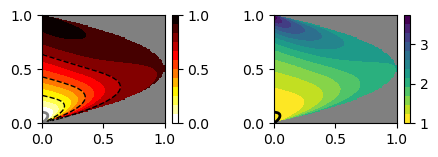

In [12]:
mean_vals = homogeneous_distribution(mean_range["n"], mean_range["m"], mean_range["M"])
pol = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])

fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))

cax = ax[0].imshow(FIG_B_RI, cmap=my_hot_r, aspect="auto", origin="lower", 
                   extent=[0, 1, 0, 1], vmin=0, vmax=1)
cbar = fig.colorbar(cax, ax=ax[0])
CS = ax[0].contour(pol, mean_vals, FIG_B_RI, 
                   levels=[0.25, 0.5, 0.75], linewidths=1, 
                   colors="black", linestyles="dashed")

cax = ax[1].imshow(FIG_B_R0, cmap=my_vir_r, aspect="auto", origin="lower",
                   extent=[0, 1, 0, 1], vmin=1)
cbar = fig.colorbar(cax, ax=ax[1])
CS = ax[1].contour(pol, mean_vals, FIG_B_R0, 
                   levels=[1], linewidths=2, 
                   colors="black")
CS = ax[0].contour(pol, mean_vals, FIG_B_R0, 
                   levels=[1], linewidths=2, 
                   colors="gray")

fig.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


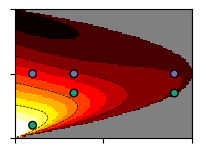

In [13]:
col_pol_circles = ["#1b9e77", "#7570b3"]
name = "SIRT_B(m,p)_RI.pdf"

fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_B_RI, cmap=my_hot_r, aspect="auto", origin="lower", extent=[0, 1, 0, 1], vmin=0, vmax=1, interpolation="none")
cbar = fig.colorbar(cax, ax=ax)
#CS = ax.contour(h_vals, pol*4, FIG_C_RI, levels=[0.25, 0.5, 0.75], linewidths=1, colors="black", linestyles="dashed")
CS = ax.contour(pol, mean_vals, FIG_B_RI, 
    levels=[0.25, 0.5, 0.75], linewidths=0.5, 
    colors="black", linestyles="dashed")

Xs = np.array([0.1, 0.3, 0.5, 0.7, 0.9])
Ys = np.zeros(5)+0.001

#ax.plot(1-Xs, 1-Ys, 'o', color='black', markersize=1)
#ax.plot(1-Ys, 1-Xs, 'o', color='black', markersize=1)

Xs = np.array([0.1, 0.1, 1/3, 1/3, 0.9, 0.9])
Ys = np.array([0.1, 0.5, 0.35, 0.5, 0.35, 0.5])
Colors = [col_pol_circles[0], col_pol_circles[1],col_pol_circles[0], col_pol_circles[1],col_pol_circles[0], col_pol_circles[1]]

ax.scatter(Xs, Ys, c=Colors, marker='o', s=30, zorder = 100,edgecolors='black')

ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])


fig.patch.set_visible(False)


double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


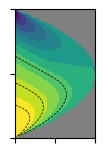

In [14]:
name = "SIRT_B(m,p)_R0.pdf"

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(FIG_B_R0, cmap=my_vir_r, aspect="auto", origin="lower", extent=[0, 1, 0, 1], vmin = 1, interpolation="none")
cbar = fig.colorbar(cax, ax=ax)
#CS = ax.contour(h_vals, pol*4, FIG_C_RI, levels=[0.25, 0.5, 0.75], linewidths=1, colors="black", linestyles="dashed")
CS = ax.contour(pol, mean_vals, FIG_B_RI, 
    levels=[0.25, 0.5, 0.75], linewidths=0.5, 
    colors="black", linestyles="dashed")
ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.1        0.29999998 0.5        0.6999999  0.9       ]


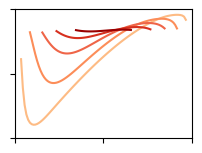

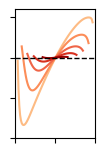

In [15]:
NP = 5  # number of polarization points
NM = 100  # number of mean points
pol_range={"m": 0, "M": 1, "n": NP}  
mean_range={"m": 0, "M": 1, "n": NM}         

pols = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])
means = homogeneous_distribution(mean_range["n"], mean_range["m"], mean_range["M"])

#results = run_pol_mean_sweep_SIRT(
results = sweep_pol_mean_SIRT(
    mean_range=mean_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    susceptibility_rate=0.4,
    test_rate = 1/3,  # Set a fixed testing rate
    batch_size=1000
)
(S_final, I_final, R_final), R0, OH = results

S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Correct reshaping
S = S.reshape(NM, NP).T  # Shape becomes (NP, NM)
I = I.reshape(NM, NP).T
R = R.reshape(NM, NP).T
R0 = R0.reshape(NM, NP).T
OH = OH.reshape(NM, NP).T
temp = R + I

fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(NP):
    ax.plot(1-means, temp[i, :], color = CP1[i])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

name = "SIRT_B_(m)_RI.pdf"
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)


idx = (np.abs(means - 0.5)).argmin()

# Plot each polarization value
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NP):
    ax.plot(1-means, (temp[i, :]-temp[i, idx])/temp[i, idx]*100, color = CP1[i])
    
ax.set_xlabel("mean behavior")
ax.set_ylabel("% change in I")

# plot an horizontal line at 0

ax.axhline(0, color='black', lw=1, ls='--')

ax.set_ylim(-100, 60)
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([-100,-50, 0, 50])

name = "SIRT_B_(m)_RI100.pdf"
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)
print(pols)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


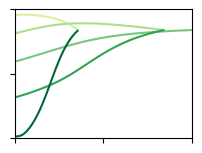

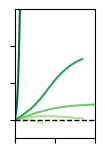

In [16]:
NP = 100  # number of polarization points
NM = 5  # number of mean points
pol_range={"m": 0, "M": 1, "n": NP}  
mean_range={"m": 0, "M": 1, "n": NM}         

pols = np.linspace(pol_range["m"], pol_range["M"], pol_range["n"])
means = np.linspace(mean_range["m"], mean_range["M"], mean_range["n"])

#results = run_pol_mean_sweep_SIRT(
results = sweep_pol_mean_SIRT(
    mean_range=mean_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    susceptibility_rate=0.4,
    test_rate = 1/3,  # Set a fixed testing rate
    batch_size=1000
)
(S_final, I_final, R_final), R0, OH = results

S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Correct reshaping
S = S.reshape(NM, NP).T  # Shape becomes (NP, NM)
I = I.reshape(NM, NP).T
R = R.reshape(NM, NP).T
R0 = R0.reshape(NM, NP).T
OH = OH.reshape(NM, NP).T

temp = R + I

# Plot each polarization value
fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(NM):
    ax.plot(pols, temp[:, i], color = CP2[i])

ax.set_xlabel("Polarization")
ax.set_ylabel("I")
ax.set_ylim(0, 1)
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 0.5, 1])

name = "SIRT_B_(p)_RI.pdf"
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)



idx = 0

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NM):
    ax.plot(pols, (temp[:, i]-temp[0, i])/temp[0, i]*100, color = CP2[i])

ax.set_xlabel("Polarization")
ax.set_ylabel("% change in I")
# plot an horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='--')

ax.set_ylim(-50, 300)
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_yticks([0, 100, 200])
fig.patch.set_visible(False)
name = "SIRT_B_(p)_RI100.pdf"
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

In [33]:
NP = 100  # number of polarization points
NH = 100  # number of homophily points
h_range={"m": -10.0, "M": 10.0, "n": NH}
pol_range={"m": 0, "M": 1, "n": NP}


#results = run_h_pol_sweep_SIRT(
results = sweep_hom_pol_SIRT(
    h_range=h_range,     # homophily range
    pol_range=pol_range, # polarization range
    dT=1,
    T=1000,
    recovery_rate=0.1,
    susceptibility_rate=0.3,  
    test_rate = 1/3,     # Fixed testing rate range
    N_COMPARTMENTS=5,
    batch_size=1000
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = S.reshape(NP, NH)  # No transpose needed
I = I.reshape(NP, NH)
R = R.reshape(NP, NH)
R0 = R0.reshape(NP, NH)
OH = OH.reshape(NP, NH)

FIG_C_RI = R + I
FIG_C_R0 = R0
FIG_C_OH = OH

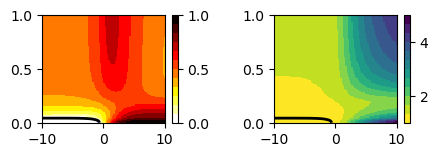

In [34]:
h_vals = homogeneous_distribution(h_range["n"], h_range["m"], h_range["M"])
pol = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])

fig, ax = plt.subplots(1,2, figsize=(2*Lx, Ly))

cax = ax[0].imshow(FIG_C_RI, cmap=my_hot_r, aspect="auto", origin="lower", 
    extent=[h_range["m"], h_range["M"], 0, 1],  
    vmin=0, vmax=1, interpolation="none")
cbar = fig.colorbar(cax, ax=ax[0])

cax = ax[1].imshow(FIG_C_R0, cmap=my_vir_r, aspect="auto", origin="lower",
    extent=[h_range["m"], h_range["M"], 0, 1],  
    vmin=1, vmax=5, interpolation="none")
cbar = fig.colorbar(cax, ax=ax[1])
CS = ax[1].contour(h_vals, pol, FIG_C_R0,  
    levels=[1], linewidths=2, colors="black")
CS = ax[0].contour(h_vals, pol, FIG_C_R0,  
    levels=[1], linewidths=2, colors="black")


fig.tight_layout()

In [31]:
# homophily values for masks, testing, and vaccination
Mh = np.array([2.2332, 2.5102, 2.7551])
Th = np.array([2.1429, 2.3265, 2.5102])
Vh = np.array([1.6531, 1.8367, 1.9592])

# polarization values for masks, testing, and vaccination
Mp = np.array([2.2332, 0.2898, 0.3149])
Tp = np.array([0.4575, 0.4780, 0.4981])
Vp = np.array([0.5387, 0.5637, 0.5913])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


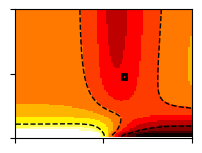

In [35]:
name = "I(h,pol)_SIRT.pdf"
fig, ax = plt.subplots(figsize=(Lx, Ly))
cax = ax.imshow(FIG_C_RI, cmap =  my_hot_r, aspect = "auto", origin = "lower", extent = [h_vals[0],h_vals[-1],pol[0],pol[-1]], vmin = 0, vmax = 1, interpolation="none")
#cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(h_vals, pol, FIG_C_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")

ax.set_xlim([-10, 10])
ax.set_ylim([0, 1])
ax.set_xticks([-10, 0, 10])
ax.set_yticks([0, 0.5, 1])

# add a square for the homophily-polarization values
# bottom left corner = Th[0], Tp[0]
# top right corner = Th[2], Tp[2]
rect = plt.Rectangle((Th[0], Tp[0]), Th[2]-Th[0], Tp[2]-Tp[0], linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(rect)

fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


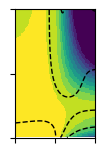

In [20]:
name = "R0(h,pol)_SIRT.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(FIG_C_R0, cmap =  my_vir_r, aspect = "auto", origin = "lower", 
                extent = [h_vals[0],h_vals[-1],pol[0],pol[-1]], vmin = 1, vmax = 5,
                interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
CS = ax.contour(h_vals, pol, FIG_C_RI, levels = [0.25, 0.5, 0.75], linewidths = 1, colors = "black", linestyles = "dashed")
ax.set_xticks([-10, 0, 10])
ax.set_yticks([0, 0.5, 1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

In [21]:
CP2[2] = "#000"

[0. 2. 4. 6. 8.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0. 2. 4. 6. 8.]


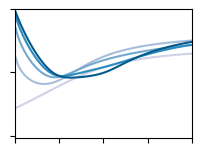

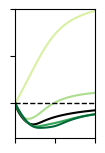

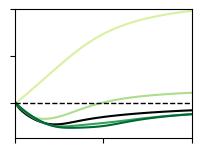

In [22]:
NP = 100  # number of polarization points
NH = 5  # number of homophily points
h_range={"m": -1, "M": 9, "n": NH}
pol_range={"m": 0, "M": 1, "n": NP}
pols = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])
homs = homogeneous_distribution(h_range["n"], h_range["m"], h_range["M"])
print(homs)
#results = run_h_pol_sweep_SIRT(
results = sweep_hom_pol_SIRT(
    h_range=h_range,     # homophily range
    pol_range=pol_range, # polarization range
    dT=1,
    T=1000,
    recovery_rate=0.1,
    susceptibility_rate=0.3,  
    test_rate = 1/3,     # Fixed testing rate range
    batch_size=1000
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = S.reshape(NP, NH)  # No transpose needed
I = I.reshape(NP, NH)
R = R.reshape(NP, NH)
R0 = R0.reshape(NP, NH)
OH = OH.reshape(NP, NH)

temp = R + I


idx = (np.abs(pols - 0)).argmin()
# Plot each homophily value
fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(NH):
    ax.plot(pols, temp[:,i], color = CP3[i])

ax.set_xlabel("Polarization")
ax.set_ylabel("I")
ax.set_ylim(-0.02, 1)
ax.set_xlim(0,1)

name = "SIRT_C_(pol)_I.pdf"
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NH):
    ax.plot(pols, (temp[:,i]-temp[idx,i])/temp[idx,i]*100, color = CP2[i])

# plot an horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='--')

#ax.set_xlabel("Polarization")
#ax.set_ylabel("% change in I")
ax.set_ylim(-75, 200)
ax.set_xlim(0,1)
ax.set_yticks([0,100, 200])
ax.set_xticks([0,0.5,1])

name = "SIRT_C_(pol)_I100.pdf"
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)




fig, ax = plt.subplots(figsize=(Lx, Ly))


name = "SIRT_C_(pol)_I100_long.pdf"
for i in range(NH):
    ax.plot(pols, (temp[:,i]-temp[idx,i])/temp[idx,i]*100, color = CP2[i])

# plot an horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='--')

#ax.set_xlabel("Polarization")
#ax.set_ylabel("% change in I")
ax.set_ylim(-75, 200)
ax.set_xlim(0,1)
ax.set_yticks([0,100, 200])
ax.set_xticks([0,0.5,1])
fig.patch.set_visible(False)




double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)


print(homs)

In [23]:
print(CP2)
a = "#d9f0a3"

['#d9f0a3', '#addd8e', '#000', '#31a354', '#006837']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


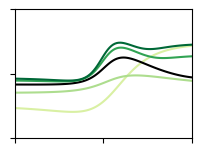

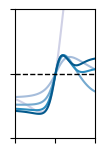

In [24]:
NP = 5  # number of polarization points
NH = 100  # number of homophily points
h_range={"m": -10.0, "M": 10.0, "n": NH}
pol_range={"m": 0, "M": 1, "n": NP}

homs = homogeneous_distribution(h_range["n"], h_range["m"], h_range["M"])
pols = homogeneous_distribution(pol_range["n"], pol_range["m"], pol_range["M"])

#results = run_h_pol_sweep_SIRT(
results = sweep_hom_pol_SIRT(
    h_range=h_range,     # homophily range
    pol_range=pol_range, # polarization range
    dT=1,
    T=1000,
    recovery_rate=0.1,
    susceptibility_rate=0.3,  
    test_rate = 1/3,     # Fixed testing rate range
    batch_size=1000
)

(S_final, I_final, R_final), R0, OH = results
S = np.sum(S_final, axis=1)
I = np.sum(I_final, axis=1)
R = np.sum(R_final, axis=1)

# Reshape arrays
S = S.reshape(NP, NH)  # No transpose needed
I = I.reshape(NP, NH)
R = R.reshape(NP, NH)
R0 = R0.reshape(NP, NH)
OH = OH.reshape(NP, NH)

temp = R + I

fig, ax = plt.subplots(figsize=(Lx, Ly))
for i in range(NP):
    ax.plot(homs, temp[i, :], color = CP2[i])

ax.set_ylim(0, 1)
ax.set_xlim(-10, 10)
ax.set_xticks([-10, 0, 10])
ax.set_yticks([0, 0.5, 1])

name = "SIRT_C_(h)_RI.pdf"
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)

# find the index of the homophily value closest to 0
idx = (np.abs(homs - 0)).argmin()

fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
for i in range(NP):
    ax.plot(homs, (temp[i, :]-temp[i, idx])/temp[i, idx]*100, color = CP3[i])

# plot an horizontal line at 0
ax.axhline(0, color='black', lw=1, ls='--')

#ax.set_xlabel("Homophily")
#ax.set_ylabel("% change in I")
ax.set_ylim(-50, 50)
ax.set_xlim(-10, 10)
ax.set_xticks([-10, 0, 10])
ax.set_yticks([-50, 0, 50])

name = "SIRT_C_(h)_RI100.pdf"
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels)


In [25]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


test_max_range={"m": 0.3, "M": 0.3, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRTD(
    test_max_range=test_max_range,
    pol_range=pol_range,
    dT=1,
    T=1000,
    batch_size=1000,
    susceptibility_rate = 0.25,
    N_COMPARTMENTS = N_COMPARTMENTS
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRT_disconnected.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

NameError: name 'sweep_pol_SPB_SIRTD' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


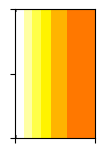

In [ ]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


test_max_range={"m": 0.3, "M": 0.3, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRT(
    test_max_range=test_max_range,
    pol_range=pol_range,
    h=0,
    dT=1,
    T=1000,
    batch_size=1000,
    susceptibility_rate = 0.25,
    N_COMPARTMENTS = N_COMPARTMENTS
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRT.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


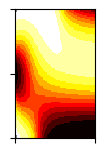

In [ ]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


test_max_range={"m": 0.3, "M": 0.3, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRT(
    test_max_range=test_max_range,
    pol_range=pol_range,
    dT=1,
    T=1000,
    h = 10,
    batch_size=1000,
    susceptibility_rate = 0.25,
    N_COMPARTMENTS = N_COMPARTMENTS
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRT_positive_h.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


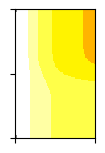

In [ ]:
NP = 100
NS = 1
N_COMPARTMENTS = 100


test_max_range={"m": 0.3, "M": 0.3, "n": NS}
pol_range={"m": 0, "M": 1, "n": NP}

results = sweep_pol_SPB_SIRT(
    test_max_range=test_max_range,
    pol_range=pol_range,
    h=-10,
    dT=1,
    T=1000,
    batch_size=1000,
    susceptibility_rate = 0.25,
    N_COMPARTMENTS = N_COMPARTMENTS
)

(S_final, I_final, R_final), _, _ = results

S = S_final.reshape(NP, N_COMPARTMENTS).transpose()
I = I_final.reshape(NP, N_COMPARTMENTS).transpose()
R = R_final.reshape(NP, N_COMPARTMENTS).transpose()

Sf = np.zeros((N_COMPARTMENTS, NP))
If = np.zeros((N_COMPARTMENTS, NP))
Rf = np.zeros((N_COMPARTMENTS, NP))
for i in range(NP):

    N_i = S_final[i,:] + I_final[i,:] + R_final[i,:]
    Sf[:,i] = S_final[i,:]/N_i
    If[:,i] = I_final[i,:]/N_i
    Rf[:,i] = R_final[i,:]/N_i

RI = Rf + If
name = "RI_fraction_SIRT_negative_h.pdf"
fig, ax = plt.subplots(figsize=(Lx/2.2, Ly))
cax = ax.imshow(np.flipud(RI), cmap = my_hot_r, aspect = "auto", origin = "lower", extent = [0,1,0,1], vmin = 0, vmax = 1, interpolation = "none")
cbar = fig.colorbar(cax, ax = ax)
ax.set_yticks([0,0.5,1])
fig.patch.set_visible(False)
double_savefig(fig, ax, name, path_Plot_with_labels, path_Plot_without_labels, cbar=cbar)